# **Data Preprocessing**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load Dataset into pandas dataframe
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Credit_Risk_Scoring_System.csv", low_memory=False)

In [ ]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
dataset.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [ ]:
dataset.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260697,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2260698,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260699,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
dataset.isnull().sum()

,0
id,0
member_id,2260701
loan_amnt,33
funded_amnt,33
funded_amnt_inv,33
...,...
settlement_status,2226455
settlement_date,2226455
settlement_amount,2226455
settlement_percentage,2226455


In [ ]:
dataset.duplicated().any()

False

In [ ]:
irrelevant_columns = [
    'id', 'member_id', 'url', 'desc', 'zip_code', 'title',
    'emp_title', 'emp_length', 'annual_inc_joint', 'dti_joint',
    'verification_status_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
    'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
    'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
    'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
    'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag',
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]

# Remove the irrelevant columns
dataset = dataset.drop(columns=irrelevant_columns)

# Show the cleaned dataframe
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,...,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,110000.0,...,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN


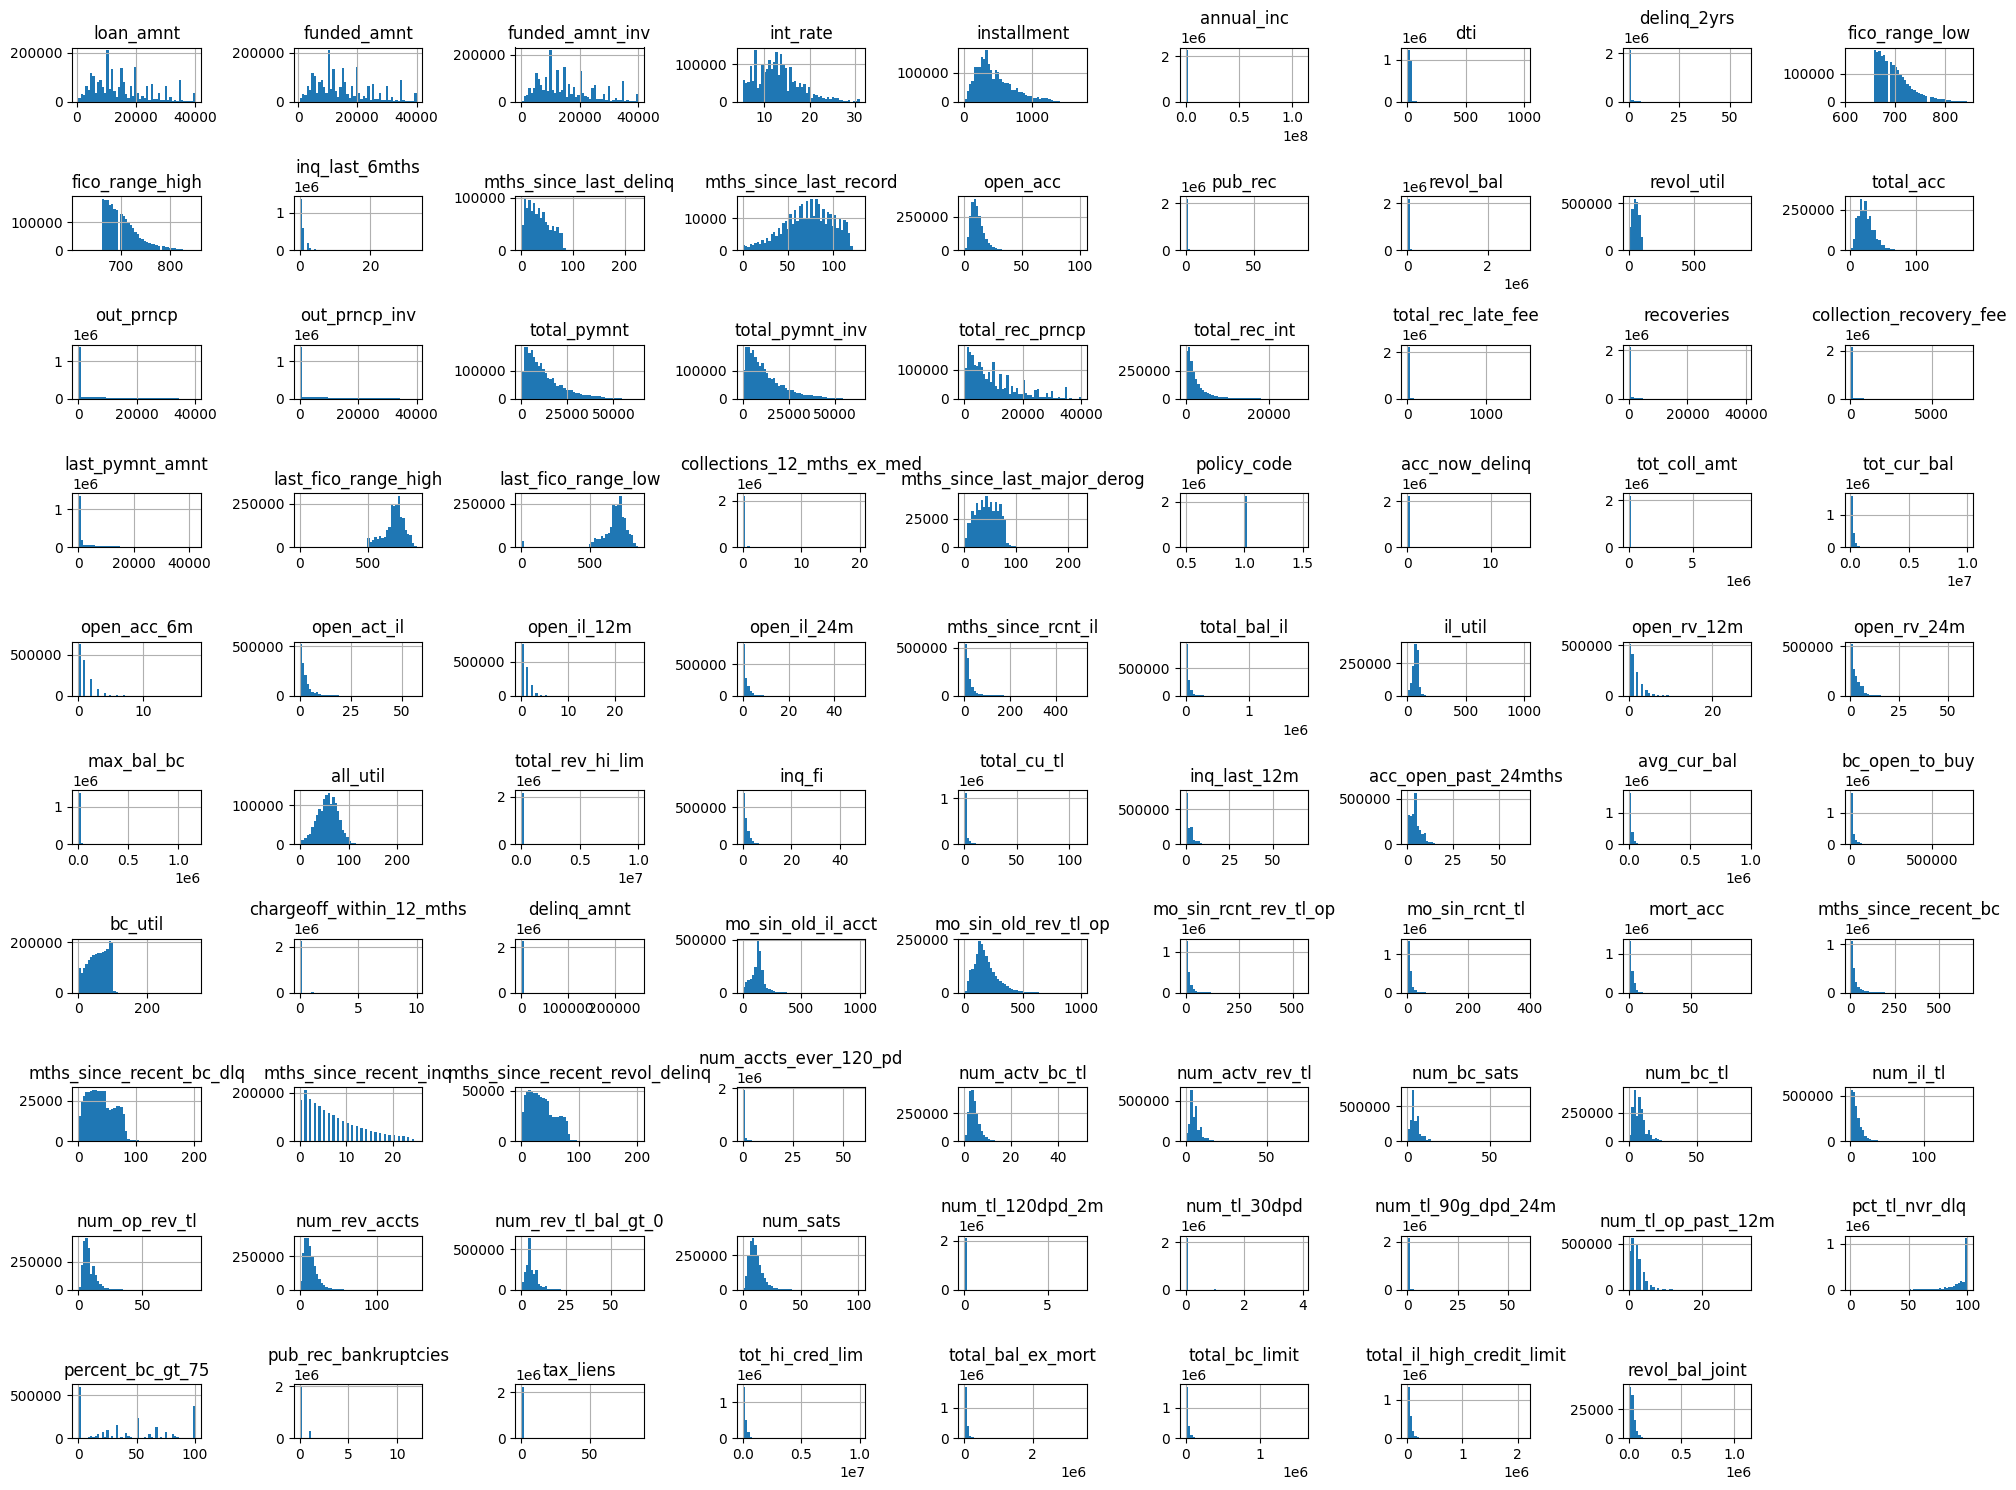

In [ ]:
dataset.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# Display only columns where more than 50% of values are null
threshold = 0.5 * len(dataset)
high_null_cols = dataset.isnull().sum()[dataset.isnull().sum() > threshold]
print(high_null_cols)

mths_since_last_delinq            1158535
mths_since_last_record            1901545
next_pymnt_d                      1345343
mths_since_last_major_derog       1679926
mths_since_recent_bc_dlq          1741000
mths_since_recent_revol_delinq    1520342
revol_bal_joint                   2152681
dtype: int64


In [ ]:
dataset = dataset.drop(columns=high_null_cols.index)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 98 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  purpose                     object 
 15  addr_state                  object 
 16  dti                         float64
 17  delinq_2yrs                 float64
 18  earliest_cr_line            object 
 19  fico_range_low       

In [ ]:
dataset.isnull().sum()

,0
loan_amnt,33
funded_amnt,33
funded_amnt_inv,33
term,33
int_rate,33
...,...
tax_liens,138
tot_hi_cred_lim,70309
total_bal_ex_mort,50063
total_bc_limit,50063


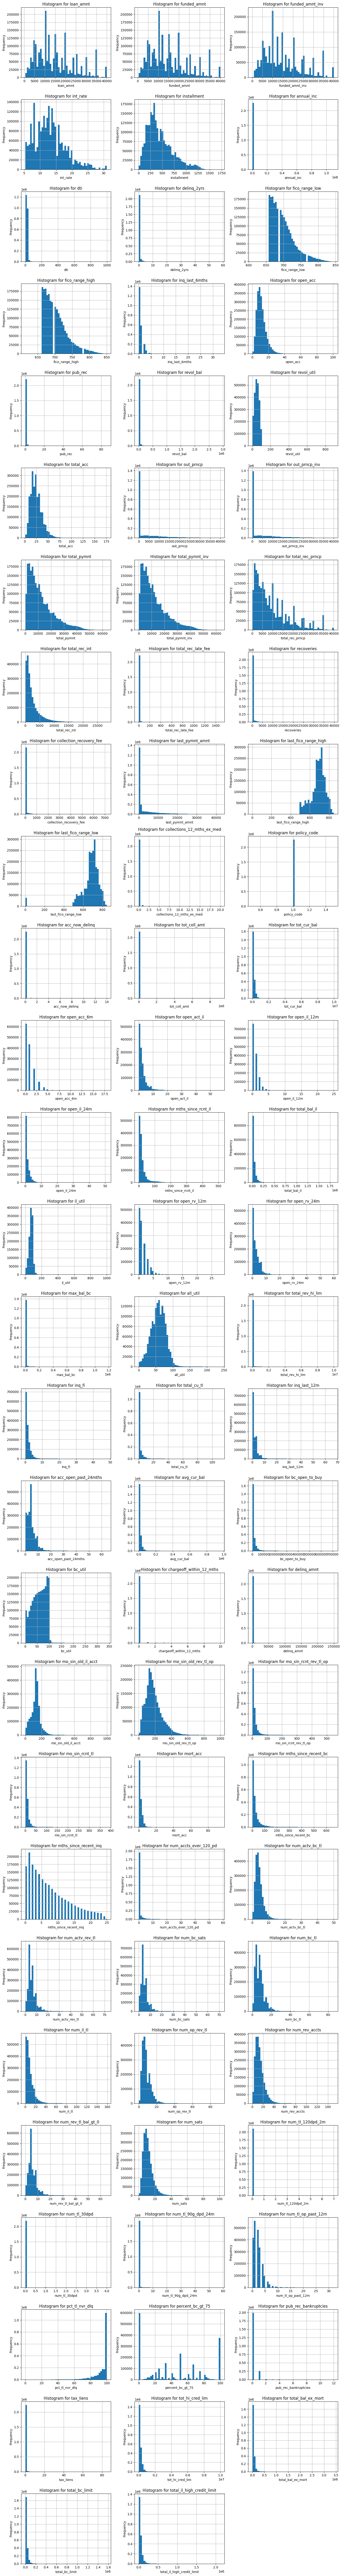

In [ ]:
# Select numerical columns with null values
numerical_with_nulls = dataset.select_dtypes(include=['float64', 'int64']).columns
numerical_with_nulls = numerical_with_nulls[dataset[numerical_with_nulls].isnull().any()]

# Create a grid of subplots
num_cols = 3
num_rows = (len(numerical_with_nulls) // num_cols) + 1

plt.figure(figsize=(15, num_rows * 4))

# Plot histograms for each numerical column with null values
for i, column in enumerate(numerical_with_nulls):
    plt.subplot(num_rows, num_cols, i + 1)
    dataset[column].hist(bins=50)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


    plt.tight_layout()
    plt.show()


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Normalize only the columns with null values
dataset[numerical_with_nulls] = scaler.fit_transform(dataset[numerical_with_nulls])

# Apply mean imputation
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the normalized columns
dataset[numerical_with_nulls] = imputer.fit_transform(dataset[numerical_with_nulls])

# Check the updated dataset to verify
print(dataset[numerical_with_nulls].isnull().sum())


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 83, dtype: int64


In [ ]:
# Identify categorical columns
categorical_with_nulls = dataset.select_dtypes(include=['object']).columns
categorical_with_nulls = categorical_with_nulls[dataset[categorical_with_nulls].isnull().any()]

# Initialize SimpleImputer with 'most_frequent' strategy (for mode imputation)
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute the missing values for categorical columns
dataset[categorical_with_nulls] = imputer_categorical.fit_transform(dataset[categorical_with_nulls])

# Verify that there are no missing values in the categorical columns
print(dataset[categorical_with_nulls].isnull().sum())


term                   0
grade                  0
sub_grade              0
home_ownership         0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64


In [ ]:
dataset.isnull().sum().any()

False

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 98 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  purpose                     object 
 15  addr_state                  object 
 16  dti                         float64
 17  delinq_2yrs                 float64
 18  earliest_cr_line            object 
 19  fico_range_low       

In [ ]:
# Set Seaborn style for the plots
sns.set(style='whitegrid')

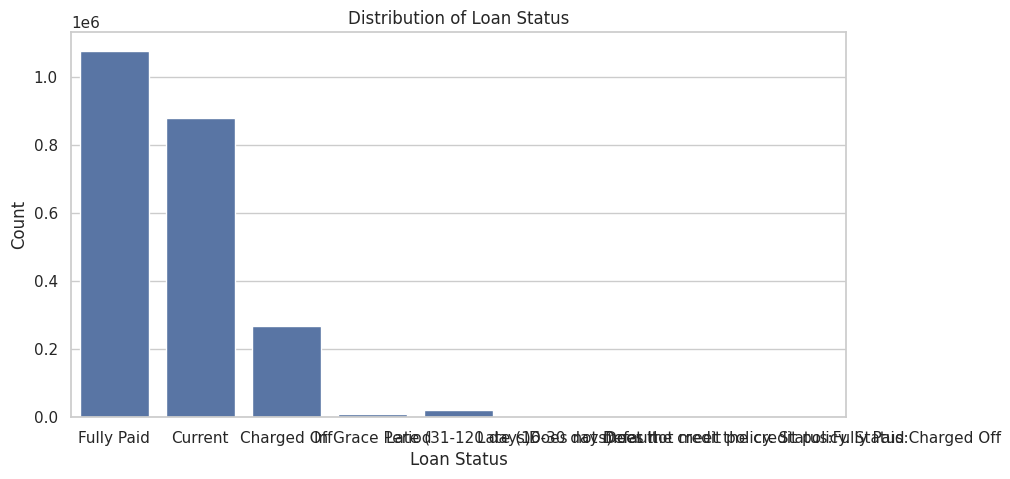

In [ ]:
# Visualize target variable distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

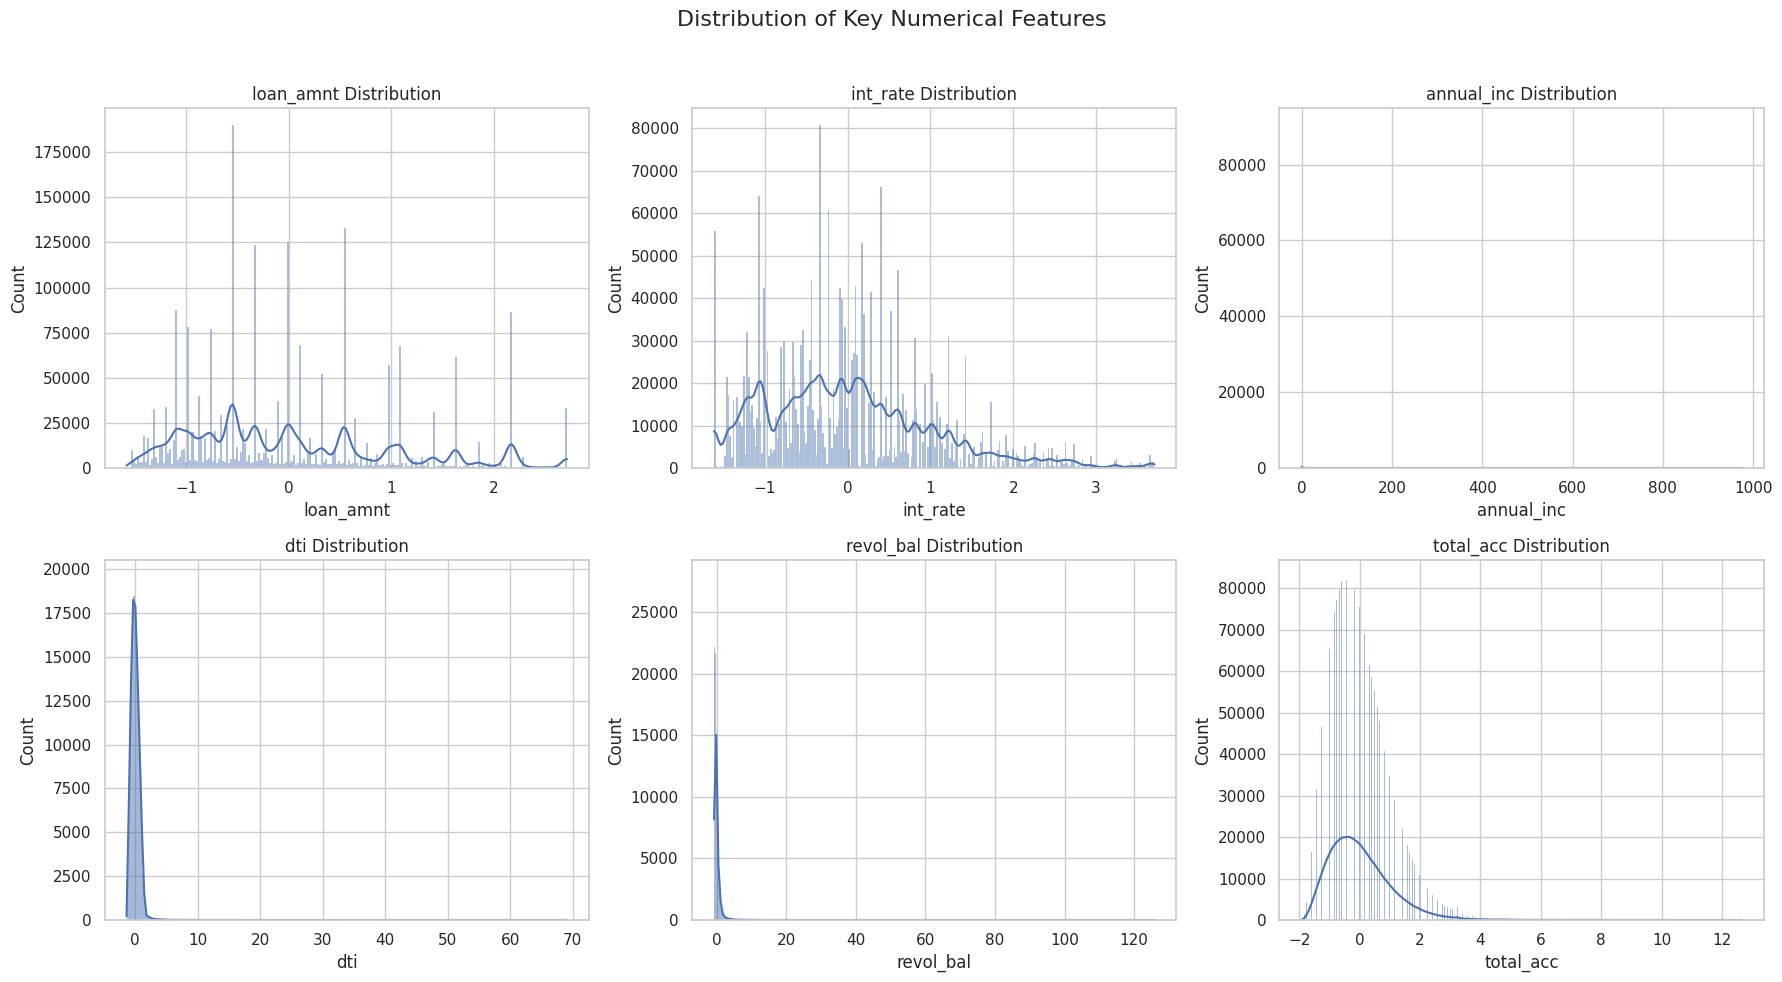

In [ ]:
# Plot distributions of a few key numeric features
numeric_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'total_acc']

# Plot each numeric feature in a separate histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

for i, col in enumerate(numeric_columns):
    sns.histplot(dataset[col].dropna(), kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-24-9bc8a6f571f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col], palette='Set2', ax=axes[i//3, i%3])
<ipython-input-24-9bc8a6f571f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col], palette='Set2', ax=axes[i//3, i%3])
<ipython-input-24-9bc8a6f571f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col], palette='Set2', ax=axes[i//3, i%3])
<ipython-input-24-9bc8a6f571f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

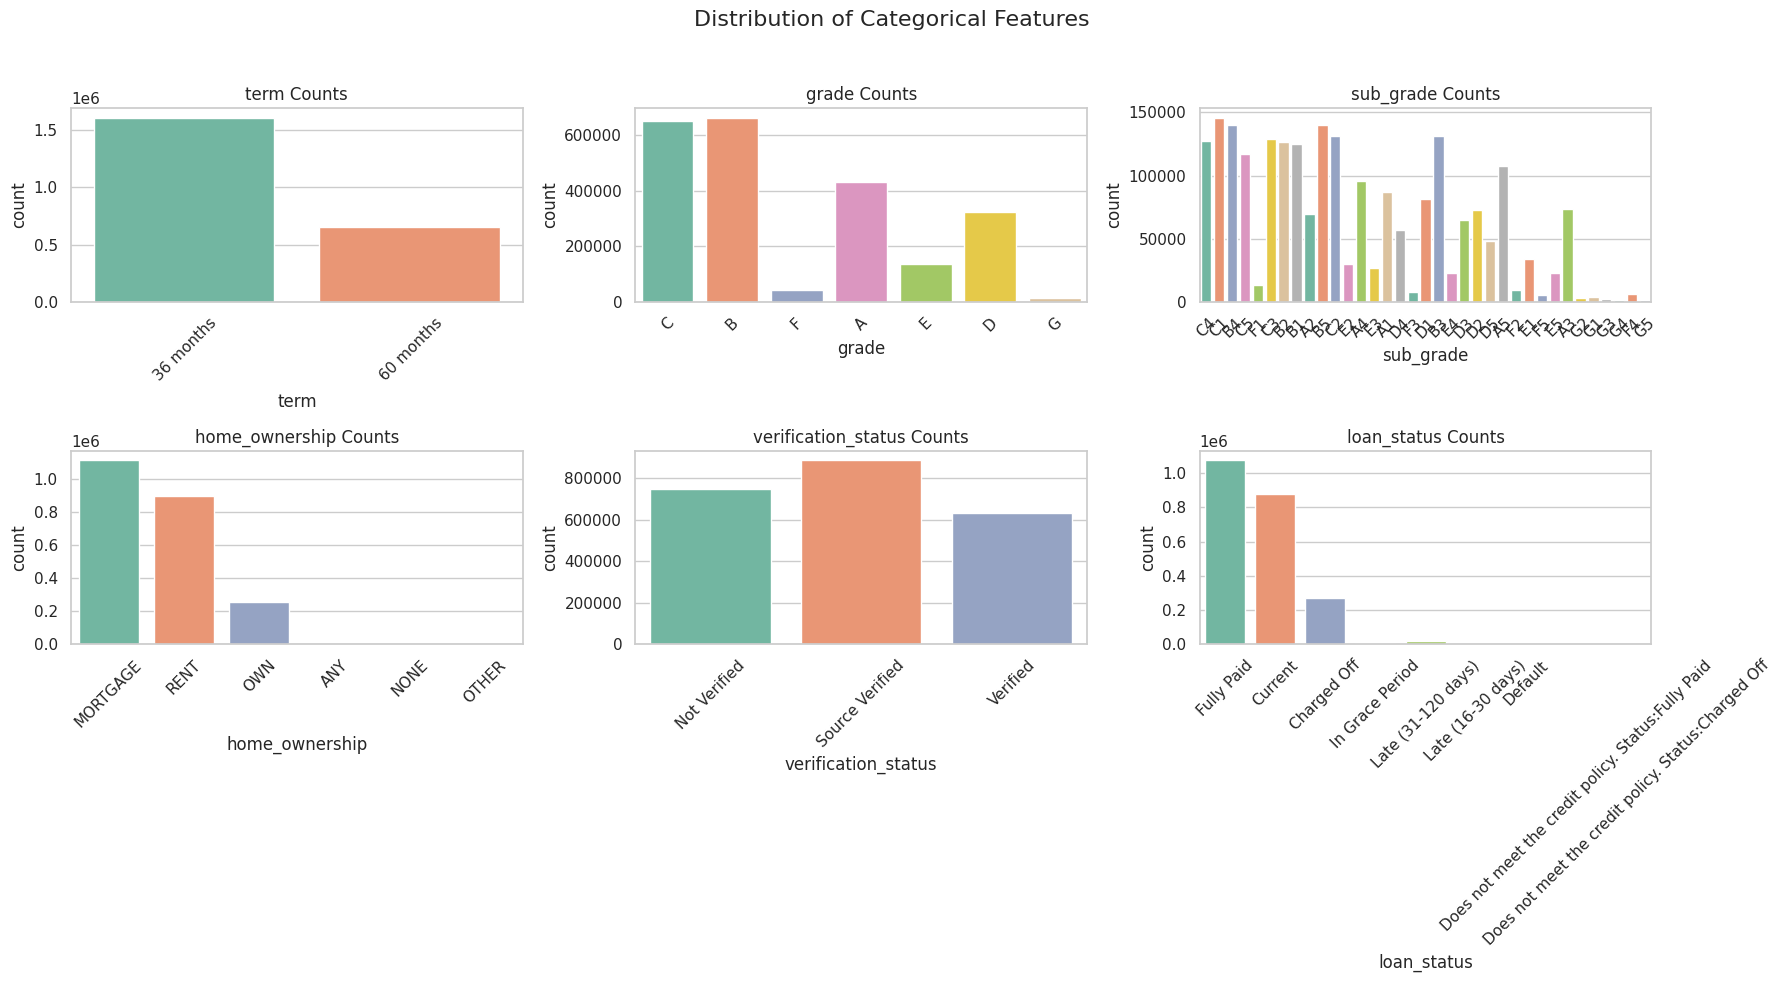

In [ ]:
# count plots for some of the categorical features
categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(x=dataset[col], palette='Set2', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} Counts')
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-25-6c9e056d1f45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='int_rate', data=dataset, palette='Set3')


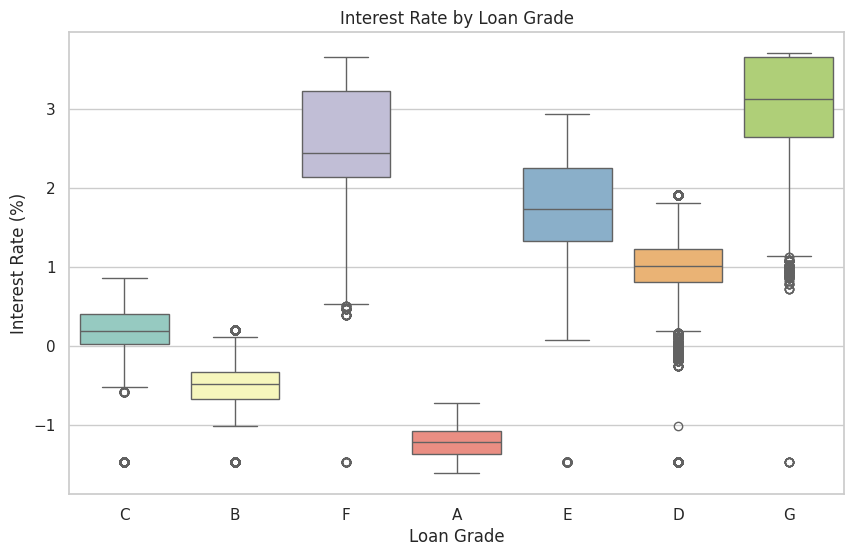

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=dataset, palette='Set3')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

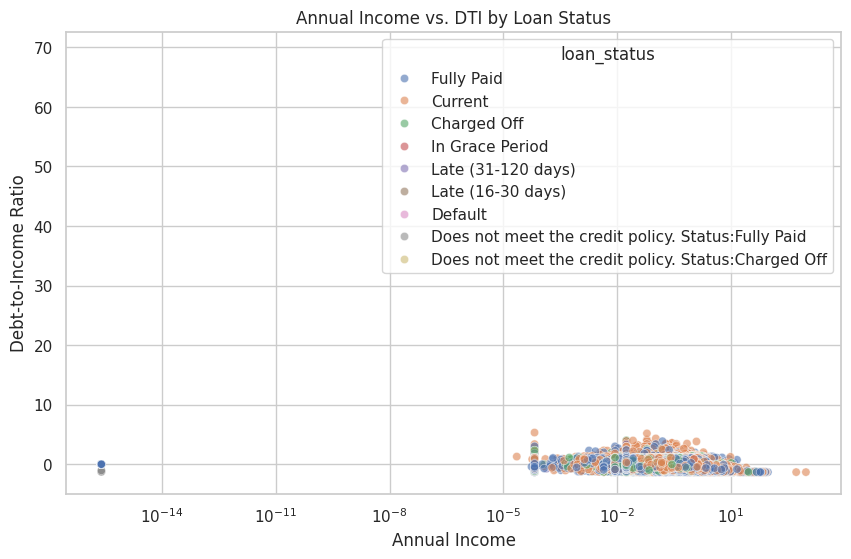

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=dataset, alpha=0.6)
plt.title('Annual Income vs. DTI by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.xscale('log')
plt.show()


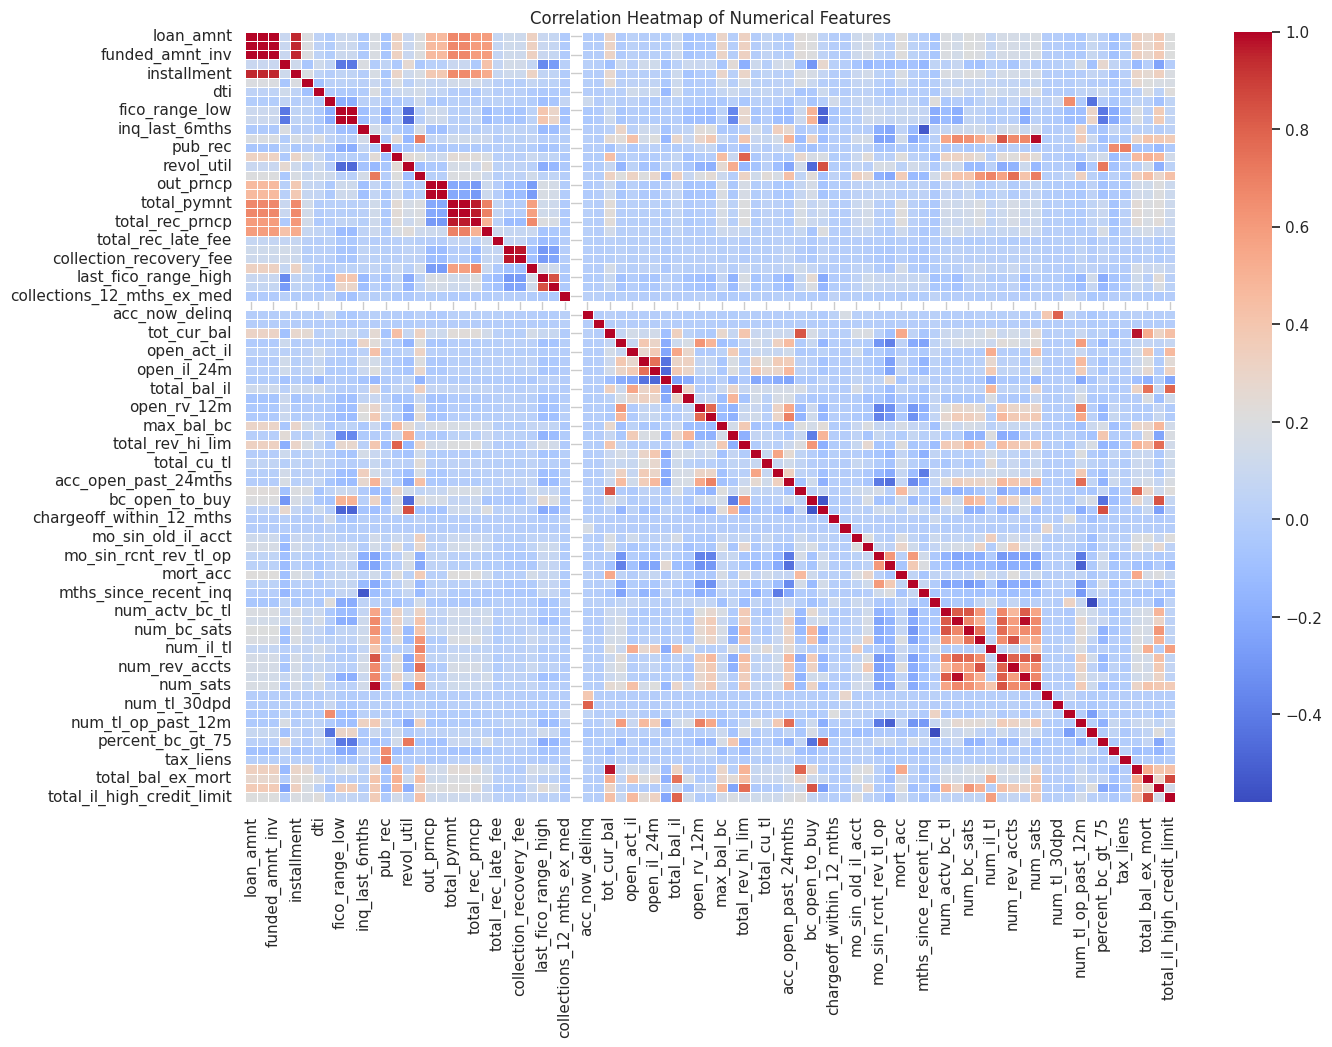

In [ ]:
# Heatmap to show correlation between numerical features
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

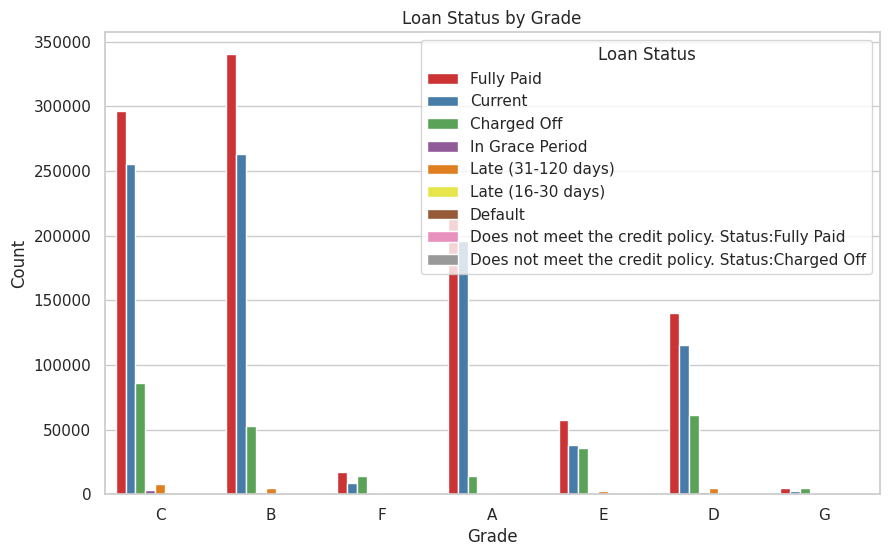

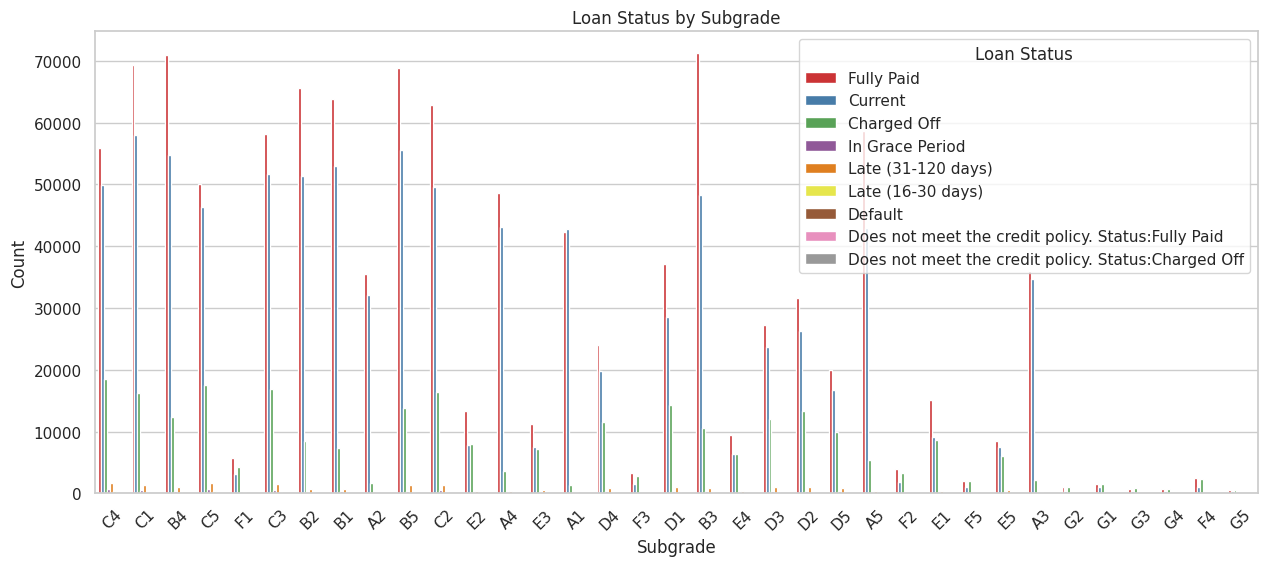

In [ ]:
# Count plot to compare loan status distribution across different loan grades
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='grade', hue='loan_status', palette='Set1')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# Count plot to show loan status by subgrade for a more granular look within each loan grade
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x='sub_grade', hue='loan_status', palette='Set1')
plt.title('Loan Status by Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-d867ec210784>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='home_ownership', y='loan_amnt', data=dataset, palette='Set2')


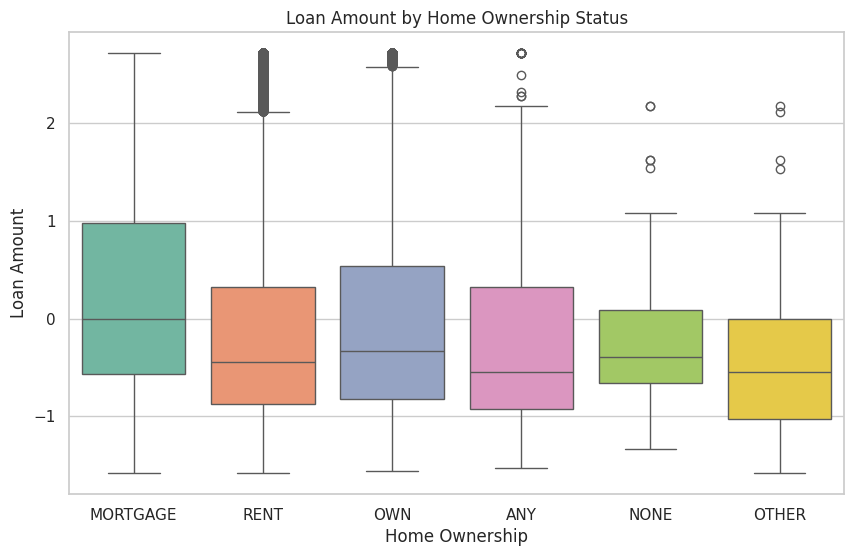

In [ ]:
# Box plot to examine loan amounts by home ownership status
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', data=dataset, palette='Set2')
plt.title('Loan Amount by Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()


In [ ]:
# Filter the dataset to only include "Fully Paid" and "Charged Off"
dataset = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Map "Fully Paid" to 1 and "Charged Off" to 0 for binary classification
dataset['loan_status_binary'] = dataset['loan_status'].map({
    'Fully Paid': 1,
    'Charged Off': 0
})


<ipython-input-30-77563b0986e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_status_binary'] = dataset['loan_status'].map({


In [ ]:
dataset['loan_status'].value_counts()

,count
loan_status,
Fully Paid,1076784
Charged Off,268559


In [ ]:
# Identify categorical columns in your dataset
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Create an empty list to store columns requiring one-hot encoding
one_hot_columns = []

# Loop through the categorical columns and apply appropriate encoding
for col in categorical_columns:
    # Check the number of unique values in the column
    unique_values = dataset[col].nunique()

    if unique_values <= 10:
        # Apply Label Encoding for columns with fewer unique values
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    else:
        # Mark columns for One-Hot Encoding that have more than 10 unique values
        one_hot_columns.append(col)


In [ ]:
# Apply One-Hot Encoding only to the columns that need it
if one_hot_columns:
    dataset = pd.get_dummies(dataset, columns=one_hot_columns, drop_first=True)


In [ ]:
dataset.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,last_credit_pull_d_Sep-2009,last_credit_pull_d_Sep-2010,last_credit_pull_d_Sep-2011,last_credit_pull_d_Sep-2012,last_credit_pull_d_Sep-2013,last_credit_pull_d_Sep-2014,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018
0,-1.245553,-1.245228,-1.242714,0,0.185668,-1.208117,2,1,-0.204021,0,...,False,False,False,False,False,False,False,False,False,False
1,1.050361,1.051143,1.052678,0,-0.228228,1.401611,2,1,-0.115287,0,...,False,False,False,False,False,False,False,False,False,False
2,0.538949,0.539629,0.541382,1,-0.478635,-0.049207,1,1,-0.133034,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.505637,-0.505165,-0.502967,1,1.936446,-0.583504,5,1,0.234618,1,...,False,False,False,False,False,False,False,False,False,False
5,-0.336980,-0.336474,-0.334348,0,0.071846,-0.152062,2,5,-0.390363,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = dataset.drop(columns=['loan_status'])  # Features
y = dataset['loan_status']  # Target label

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Check the distribution of the target labels in both train and test sets
print("Training target distribution:")
print(y_train.value_counts(normalize=True))

print("Testing target distribution:")
print(y_test.value_counts(normalize=True))


Training target distribution:
loan_status
1    0.800379
0    0.199621
Name: proportion, dtype: float64
Testing target distribution:
loan_status
1    0.800378
0    0.199622
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert numpy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [ ]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076274 entries, 0 to 1076273
Columns: 1337 entries, 0 to 1336
dtypes: float64(1337)
memory usage: 10.7 GB


In [ ]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269069 entries, 0 to 269068
Columns: 1337 entries, 0 to 1336
dtypes: float64(1337)
memory usage: 2.7 GB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1076274 entries, 1187165 to 1894595
Series name: loan_status
Non-Null Count    Dtype
--------------    -----
1076274 non-null  int64
dtypes: int64(1)
memory usage: 16.4 MB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 269069 entries, 1323845 to 283135
Series name: loan_status
Non-Null Count   Dtype
--------------   -----
269069 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


In [ ]:
# function to optimize data types
def optimize_dtype(df):
    if isinstance(df, pd.Series):  # Check if it's a Series
        col_type = df.dtype
        if col_type == 'float64':
            df = df.astype('float32')
        elif col_type == 'int64':
            df = df.astype('int32')
        elif col_type == 'bool':
            df = df.astype('int8')
    elif isinstance(df, pd.DataFrame):  # Check if it's a DataFrame
        for col in df.columns:
            col_type = df[col].dtypes
            if col_type == 'float64':
                df[col] = df[col].astype('float32')
            elif col_type == 'int64':
                df[col] = df[col].astype('int32')
            elif col_type == 'bool':
                df[col] = df[col].astype('int8')
    return df

# Apply the optimization
X_train_df = optimize_dtype(X_train_df)
X_test_df = optimize_dtype(X_test_df)
y_train = optimize_dtype(y_train)
y_test = optimize_dtype(y_test)

# Check to confirm data types have been changed
X_train_df.info()
X_test_df.info()
print(y_train.dtype)
print(y_test.dtype)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076274 entries, 0 to 1076273
Columns: 1337 entries, 0 to 1336
dtypes: float32(1337)
memory usage: 5.4 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269069 entries, 0 to 269068
Columns: 1337 entries, 0 to 1336
dtypes: float32(1337)
memory usage: 1.3 GB
int32
int32


# **Model Training**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random

In [ ]:
# Set Device
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [ ]:
# Hyperparameters
input_size = X_train.shape[1]
num_classes = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 15

In [ ]:
class CreditRiskNN(nn.Module):
    def __init__(self, input_size, num_classes=1):
        super(CreditRiskNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, num_classes)  # Binary output

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout(x)
        x = F.relu(self.layer2(x))
        x = self.dropout(x)
        x = F.relu(self.layer3(x))
        x = self.output(x)

        return x


In [ ]:
# Calculate the weight for the positive class
num_neg = (y_train == 0).sum().item()
num_pos = (y_train == 1).sum().item()
pos_weight = torch.tensor(num_neg / num_pos).to(device)

In [ ]:
# Initialize Network
model = CreditRiskNN(input_size=input_size, num_classes=num_classes).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

In [ ]:
# Load dataset
X_train_tensor = torch.tensor(X_train_df.values, dtype=torch.float16)
y_train_tensor = torch.tensor(y_train.values.ravel(), dtype=torch.float16)
X_test_tensor = torch.tensor(X_test_df.values, dtype=torch.float16)
y_test_tensor = torch.tensor(y_test.values.ravel(), dtype=torch.float16)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Subsampling 10% of the dataset for fast evaluation
total_size = len(train_loader.dataset)
subset_size = int(0.1 * total_size)  # 10% of the dataset
subset_indices = random.sample(range(total_size), subset_size)
small_train_set = Subset(train_loader.dataset, subset_indices)

# create a new DataLoader for this subset
small_train_loader = torch.utils.data.DataLoader(small_train_set, batch_size=64, shuffle=True)


In [ ]:
# Testing different learning rates
learning_rates = [0.001, 0.01, 0.1]
best_lr = None
best_loss = float('inf')

for lr in learning_rates:
    model = CreditRiskNN(input_size=input_size, num_classes=num_classes).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCEWithLogitsLoss()

    # Train the model with the smaller dataset (quick evaluation)
    model.train()
    running_loss = 0.0

    for epoch in range(3):  # Train for a few epochs only to test
        for X_batch, y_batch in small_train_loader:
            X_batch, y_batch = X_batch.to(device).float(), y_batch.to(device).float()
            y_batch = y_batch.unsqueeze(1)

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

    avg_loss = running_loss / len(small_train_loader)
    print(f"Learning rate: {lr}, Loss: {avg_loss:.4f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        best_lr = lr

print(f"Best learning rate: {best_lr}")


Learning rate: 0.001, Loss: 1.1754
Learning rate: 0.01, Loss: 1.2515
Learning rate: 0.1, Loss: 2.0649
Best learning rate: 0.001


In [ ]:
# Checkpoint Save and Load
import os

# checkpoint directory
checkpoint_dir = "/content/drive/MyDrive/model_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Checkpoint Save
def save_checkpoint(model, optimizer, scheduler, epoch, loss, filename):
    """ Save model weights, optimizer state, and scheduler state """
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, filename)
    print(f"Checkpoint saved at {filename}")

# Checkpoint Load
def load_checkpoint(model, optimizer, scheduler, filename):
    """ Load the checkpoint and resume training """
    checkpoint = torch.load(filename)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded from {filename}")
    return model, optimizer, scheduler, epoch, loss


In [ ]:
# Train Network
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Initialize tqdm progress bar for the current epoch
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for batch_idx, (X_batch, y_batch) in enumerate(loop):

        X_batch, y_batch = X_batch.to(device).float(), y_batch.to(device).float()
        y_batch = y_batch.unsqueeze(1)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_batch)

        # Calculate loss
        loss = criterion(y_pred, y_batch)
        running_loss += loss.item()

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Update tqdm description with running loss
        loop.set_postfix(loss=running_loss / (batch_idx + 1))

    # calculate the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Apply ReduceLROnPlateau scheduler after each epoch, passing the average loss
    scheduler.step(epoch_loss)

    # Save checkpoint
    checkpoint_filename = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}.pth")
    save_checkpoint(model, optimizer, scheduler, epoch, epoch_loss, checkpoint_filename)


Epoch [1/15], Loss: 0.0033
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_1.pth


Epoch [2/15], Loss: 0.0010
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_2.pth


Epoch [3/15], Loss: 0.0009
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_3.pth


Epoch [4/15], Loss: 0.0008
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_4.pth


Epoch [5/15], Loss: 0.0009
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_5.pth


Epoch [6/15], Loss: 0.0008
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_6.pth


Epoch [7/15], Loss: 0.0010
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_7.pth


Epoch [8/15], Loss: 0.0005
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_8.pth


Epoch [9/15], Loss: 0.0003
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_9.pth


Epoch [10/15], Loss: 0.0005
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_10.pth


Epoch [11/15], Loss: 0.0005
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_11.pth


Epoch [12/15], Loss: 0.0005
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_12.pth


Epoch [13/15], Loss: 0.0003
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_13.pth


Epoch [14/15], Loss: 0.0004
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_14.pth


Epoch [15/15], Loss: 0.0001
Checkpoint saved at /content/drive/MyDrive/model_checkpoints/checkpoint_epoch_15.pth


In [ ]:
# Checking accuracy
def test_model(model, loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:

            X_batch, y_batch = X_batch.to(device).float(), y_batch.to(device).float()
            y_batch = y_batch.unsqueeze(1)

            # Forward pass
            y_pred = model(X_batch)

            # Calculate loss
            loss = criterion(y_pred, y_batch)
            running_loss += loss.item()

            # Convert predictions to 0 or 1 for binary classification
            preds = torch.round(torch.sigmoid(y_pred))

            all_preds.extend(preds.cpu().numpy())  # Convert predictions to numpy
            all_labels.extend(y_batch.cpu().numpy())  # Convert labels to numpy

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    # Print out the results
    print(f"Test Loss: {running_loss / len(loader):.4f}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return accuracy, precision, recall, f1, cm


In [ ]:
test_model(model, train_loader, criterion, device)

Test Loss: 0.0001
Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[214836     11]
 [     4 861423]]


(0.9999860630285596,
 0.9999872305945667,
 0.9999953565421098,
 0.9999912935518304,
 array([[214836,     11],
        [     4, 861423]]))

In [ ]:
test_model(model, test_loader, criterion, device)

Test Loss: 0.0002
Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 53708      4]
 [     6 215351]]


(0.9999628348118884,
 0.999981426017506,
 0.9999721392850012,
 0.9999767826296923,
 array([[ 53708,      4],
        [     6, 215351]]))